In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#레이블이 따로 있지 않은 데이터이므로 파일 이름에서 레이블 가져오기
import os
import cv2
import tensorflow as tf
image_path = '/content/drive/MyDrive/dog_emotion/Dog Emotion'
class_names = sorted(os.listdir(image_path))
if 'labels.csv' in class_names:
  class_names.remove('labels.csv')
  class_names.remove('real_final_dog_emotion.keras')
import numpy as np
img_size = (200 , 200 , 3)
images = []
labels = []

for class_name in class_names:
  class_folder = os.path.join(image_path , class_name)
  if os.path.isdir(class_folder):
    for file_name in os.listdir(class_folder):
      if file_name.endswith('.jpg'):
        img_path = os.path.join(class_folder , file_name)
        #print(img_path)
        img = cv2.imread(img_path)
        if img is not None:
          img_resized = cv2.resize(img , img_size[0 : 2])
          img_cvt_rgb = cv2.cvtColor(img_resized , cv2.COLOR_BGR2RGB)
          images.append(np.asarray(img_cvt_rgb))

          #레이블 원핫 인코딩하기
          label = np.zeros(len(class_names))
          label[class_names.index(class_name)] = 1
          #print(label)
          labels.append(label)
images = np.asarray(images)
labels = np.asarray(labels)

In [12]:
from sklearn.model_selection import train_test_split
X_train , X_val , y_train , y_val = train_test_split(images , labels , test_size = 0.2)

In [11]:
class_names

['angry', 'happy', 'relaxed', 'sad']

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = img_size),
    tf.keras.layers.Rescaling(scale = 1. / 255),
    tf.keras.layers.Conv2D(64 , kernel_size = 3 , activation = 'relu' , padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64 , kernel_size = 3 , activation = 'relu' , padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size = 2),

    tf.keras.layers.Conv2D(128 , kernel_size = 2 , activation = 'relu' , padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(128 , kernel_size = 2 , activation = 'relu' , padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size = 2),

    tf.keras.layers.Conv2D(256 , kernel_size = 2 , activation = 'relu' , padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(256 , kernel_size = 2 , activation = 'relu' , padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size = 2),

    tf.keras.layers.Conv2D(512 , kernel_size = 2 , activation = 'relu' , padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(512 , kernel_size = 2 , activation = 'relu' , padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size = 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256 , activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128 , activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64 , activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(class_names) , activation = 'softmax')
])
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss' , patience = 15)
history = model.fit(X_train , y_train , epochs = 100 , validation_data = (X_val , y_val) , callbacks = [early_stopping_cb])

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 57s 351ms/step - accuracy: 0.2479 - loss: 7.6292 - val_accuracy: 0.2302 - val_loss: 1.5647
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 67s 292ms/step - accuracy: 0.2708 - loss: 1.4655 - val_accuracy: 0.2352 - val_loss: 1.5348
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 294ms/step - accuracy: 0.3024 - loss: 1.4128 - val_accuracy: 0.2340 - val_loss: 1.4994
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 294ms/step - accuracy: 0.3379 - loss: 1.3438 - val_accuracy: 0.2553 - val_loss: 1.4517
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 294ms/step - accuracy: 0.3365 - loss: 1.3426 - val_accuracy: 0.3962 - val_loss: 1.2868
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 42s 300ms/step - accuracy: 0.3514 - loss: 1.3125 - val_accuracy: 0.3925 - val_loss: 1.2546
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 294ms/step - accuracy: 0.3764 - loss: 1.2617 - val_accuracy: 0.3925 - val_loss: 1.2270
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 294ms/step - accuracy: 0.3387 -

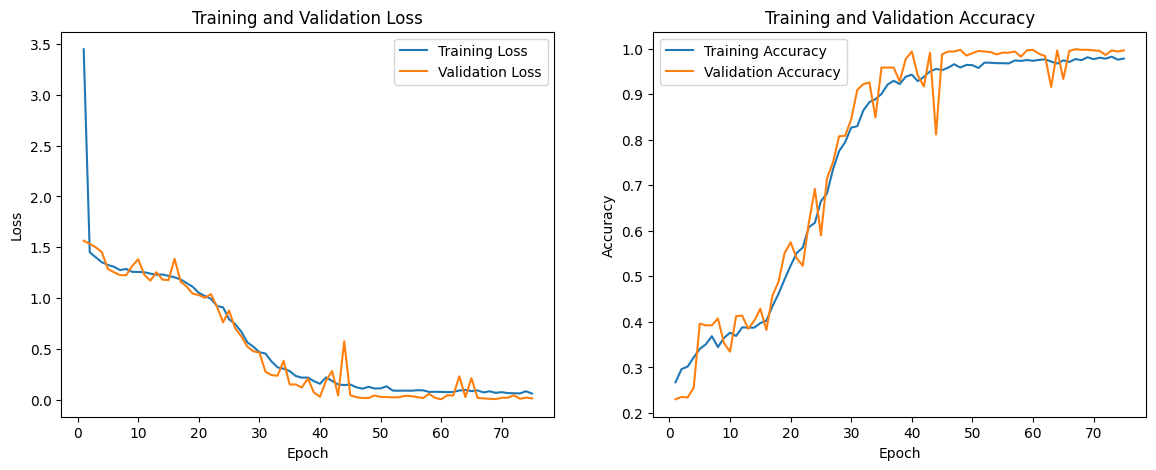

In [ ]:
history = history.history
loss = history['loss']
val_loss = history['val_loss']
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

epochs = range(1 , len(loss) + 1)
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.subplot(121)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 200, 200, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 200, 200, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 200, 200, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 200, 200, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 200, 200, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 200, 200, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 100, 100, 128)       │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 100, 100, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 100, 100, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 100, 100, 128)       │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 100, 100, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 100, 100, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 50, 50, 256)         │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 50, 50, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 50, 50, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 50, 50, 256)         │         262,4

 Total params: 63,078,158 (240.62 MB)

 Trainable params: 21,024,772 (80.20 MB)

 Non-trainable params: 3,840 (15.00 KB)

 Optimizer params: 42,049,546 (160.41 MB)

In [ ]:
model.save('/content/drive/MyDrive/dog_emotion/Dog Emotion/real_final_dog_emotion.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


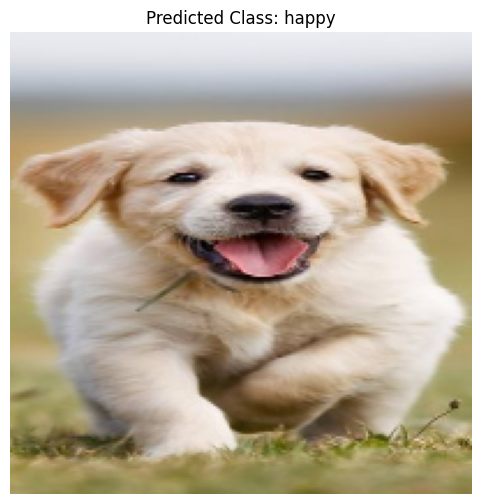

[[4.2658535e+01 5.6852043e+01 3.6072776e-02 4.5335585e-01]]
['angry', 'happy', 'relaxed', 'sad']


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#외부이미지로 테스트
test_image_path = '/content/drive/MyDrive/happydog.jpg'

def load_and_preprocess_image(image_path, target_size):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError('이미지 error.')
    img_resized = cv2.resize(img, target_size[:2])
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_array = np.asarray(img_rgb)
    img_array = np.expand_dims(img_array, axis=0)  
    return img_array

target_size = (200, 200)
test_img_array = load_and_preprocess_image(test_image_path, target_size)

predictions = model.predict(test_img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

class_names = sorted(os.listdir(image_path))
if 'labels.csv' in class_names:
    class_names.remove('labels.csv')
    class_names.remove('real_final_dog_emotion.keras')
predicted_class_name = class_names[predicted_class]

plt.figure(figsize=(6, 6))
plt.imshow(test_img_array[0].astype('uint8'))
plt.title(f'Predicted Class: {predicted_class_name}')
plt.axis('off')
plt.show()
print(predictions * 100)
print(class_names)

In [ ]:
#욜로를 사용하여 실시간 강아지 감정분석
import cv2
from ultralytics import YOLO
import tensorflow as tf
import numpy as np

detection_model = YOLO('yolov8s.pt')
prediction_model = tf.keras.models.load_model('C:\Users\godha\Desktop\myjob\phyon\dog_emotion\Dog Emotion\real_final_dog_emotion.keras')

cap = cv2.VideoCapture('C:\Users\godha\Desktop\myjob\phyon\dog_emotion\Dog Emotion\in\happydog.mp4')

while cap.isOpened():
    
    ret , frame = cap.read()

    if not ret:
        break

    results = detection_model.predict(frame , conf = 0.3)

    dog_class_id = 16
    dog_boxes = []
    filtered_results = []
    for result in results:
        for box in result.boxes:
            if box.cls == dog_class_id:
                dog_boxes.append(box)

    if dog_boxes:
        for box in dog_boxes:
            x1 , y1 , x2 , y2 = map(int , box.xyxy[0])
            crop = frame[y1 : y2 , x1 : x2]
            resized_crop = cv2.resize(crop , (200 , 200))
            data = np.expand_dims(resized_crop , axis = 0)
            prediction = prediction_model.predict(data)
            prediction_argmax = np.argmax(prediction)
            emotion_label = ['Angry' , 'Happy' , 'Relaxed' , 'Sad']
            emotion = emotion_label[prediction_argmax]

            cv2.putText(frame , emotion , (x1 + 15 , y1 + 25) , cv2.FONT_HERSHEY_COMPLEX , 0.9, (255, 0, 0), 2)
            cv2.rectangle(frame , (x1 , y1) , (x2 , y2) , (0 , 255 , 0) , 2)
    cv2.imshow('video' , frame)

    
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()